In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import stats

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pingouin as pg
from factor_analyzer import FactorAnalyzer
import semopy as sem

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from statsmodels.miscmodels.ordinal_model import OrderedModel

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

plt.style.use('ggplot')

In [3]:
#Importing the Excel file from documents
df = pd.read_excel('/Users/dannygage/Desktop/BPP/Datasets/Consumer Decision Making Data/New folder/consumerresponses.xlsx')
df.head(2)

,Gender,Age,Online purchase frequency,Academic Qualification,Type of University,Products purchased in past year(Multiple answers),Money spent on these purchases (Yearly),Which website(s) do you frequently visit?(Multiple answers),"I make a purchase from website(s) on the basis of its design and graphics (colors,layout and images etc.).",I only make a purchase from website(s) if it displays branded products.,...,What level of emotion do u see? Rejoice and love,What level of emotion do u see? Aggression and Relaxation,What level of emotion do u see? Thoughtful and Stress,What level of emotion do u see? Surprise and interest,What level of emotion do u see? arrogant and pride,What level of emotion do u see? Distress and Sad,What level of emotion do u see? Flirty and interest,What level of emotion do u see? Disgust and Sick,What level of emotion do you see? Afraid and worried,What level of emotions do you see? Happy and Giggly
0,Female,23-28,1-10,Doctrate (even if pursuing),Deemed to be University,All products,10001-20000,"Snapdeal, Flipkart, Amazon",5,5,...,5,5,5,2,4,3,5,5,5,5
1,Male,23-28,1-10,Post Graduate,State University,Electronic goods(Mobiles etc),10001-20000,"Snapdeal, Flipkart, Amazon",4,5,...,3,4,3,3,3,4,3,3,2,2


# Descriptive Analysis of the Dataset

In [4]:
df.shape

(3329, 95)

In [5]:
nacols = df.columns[df.isna().sum()>0]
df[nacols].isna().sum()

I would prefer COD(cash on delivery) even on a popular website instead of online payment.              1
I am happy and satisfied with the money transaction process on the website that I visit frequently.    1
I see performance and skills don't matter but having someone's support is important in doing a job.    1
I apply more amount of reasoning into an objective than required.                                      1
I am passionate about shopping.                                                                        1
I am sensitive to the feedback(s) that are mentioned on the website.                                   1
dtype: int64

In [6]:
df.dropna()

,Gender,Age,Online purchase frequency,Academic Qualification,Type of University,Products purchased in past year(Multiple answers),Money spent on these purchases (Yearly),Which website(s) do you frequently visit?(Multiple answers),"I make a purchase from website(s) on the basis of its design and graphics (colors,layout and images etc.).",I only make a purchase from website(s) if it displays branded products.,...,What level of emotion do u see? Rejoice and love,What level of emotion do u see? Aggression and Relaxation,What level of emotion do u see? Thoughtful and Stress,What level of emotion do u see? Surprise and interest,What level of emotion do u see? arrogant and pride,What level of emotion do u see? Distress and Sad,What level of emotion do u see? Flirty and interest,What level of emotion do u see? Disgust and Sick,What level of emotion do you see? Afraid and worried,What level of emotions do you see? Happy and Giggly
0,Female,23-28,1-10,Doctrate (even if pursuing),Deemed to be University,All products,10001-20000,"Snapdeal, Flipkart, Amazon",5,5,...,5,5,5,2,4,3,5,5,5,5
1,Male,23-28,1-10,Post Graduate,State University,Electronic goods(Mobiles etc),10001-20000,"Snapdeal, Flipkart, Amazon",4,5,...,3,4,3,3,3,4,3,3,2,2
2,Female,17-22,1-10,Post Graduate,State University,"Electronic goods(Mobiles etc), Clothing/Shoes/...",1001-5000,"Snapdeal, Flipkart, Amazon",4,3,...,5,3,4,5,3,4,4,3,4,5
3,Female,17-22,1-10,Post Graduate,State University,Clothing/Shoes/Beauty products,501-1000,Amazon,5,2,...,4,4,4,3,4,3,4,4,3,3
4,Female,17-22,1-10,Post Graduate,State University,Clothing/Shoes/Beauty products,501-1000,Amazon,5,2,...,4,4,4,3,4,3,4,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,Female,23-28,11-20,Post Graduate,Central University,Electronic goods(Mobiles etc),5001-10000,Flipkart,4,3,...,4,3,2,4,2,2,3,4,3,3
3325,Female,17-22,21-30,Post Graduate,Central University,"Electronic goods(Mobiles etc), Home appliances...",1001-5000,"Snapdeal, Flipkart, Amazon",5,3,...,4,3,4,4,2,3,3,3,5,3
3326,Female,29-34,11-20,Doctrate (even if pursuing),Central University,"Electronic goods(Mobiles etc), Books/Stationer...",10001-20000,"Flipkart, Amazon",3,3,...,5,2,3,4,3,3,3,3,4,3
3327,Male,23-28,21-30,Post Graduate,Central University,"Travel arrangements(e-tickets), Clothing/Shoes...",5001-10000,"Flipkart, Amazon, Others",3,4,...,3,3,3,3,3,4,4,3,4,3


### Next, is to look at the spread of demographic categories to better understand the participant population.

([<matplotlib.patches.Wedge at 0x165bbf430>,
 [Text(-0.07830844874261098, 1.097209089852762, 'Male'),
  Text(0.07830867546119427, -1.0972090736717015, 'Female')])

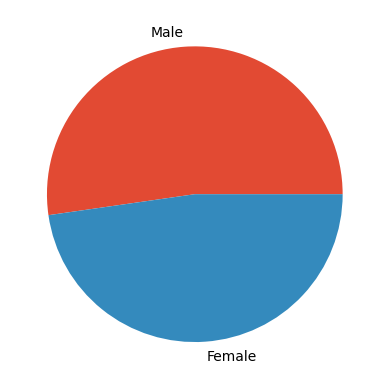

In [258]:
gender_counts = df['Gender'].value_counts()
fig, ax = plt.subplots()
ax.pie(gender_counts, labels=['Male','Female']) 

# There is a relatively even spread of male and female participants, but a slight majority of males.

In [259]:
df['Age'].value_counts()

#There is an imblaance in age groups, with the majority representation coming from the 23-28 age group, and just 8% of that being in the 34 and above category

Age
23-28           1799
17-22            822
29-34            562
34 and above     146
Name: count, dtype: int64

In [260]:
df['Type of University'].value_counts()

# Even spread of the population across university types

Type of University
Central University         894
State University           874
Private University         793
Deemed to be University    768
Name: count, dtype: int64

### Assessing the yearly spend categories as they will be used later in analysis

In [10]:
spend_counts = df['Money spent on these purchases (Yearly)'].value_counts()
spend_counts
#Looks like the currency is Indian Rupees, based on the location of the study and the very high values being spent yearly.
#This could be converted to GBP for readability, but instead these categories can be understood as low - high spending amounts regardless.
#There is a moderate imbalanance amongst the categories which will affect any machine learning which is done on this variable.

Money spent on these purchases (Yearly)
1001-5000        1440
5001-10000       1178
501-1000          279
10001-20000       260
Above 20000       115
less than 500      57
Name: count, dtype: int64

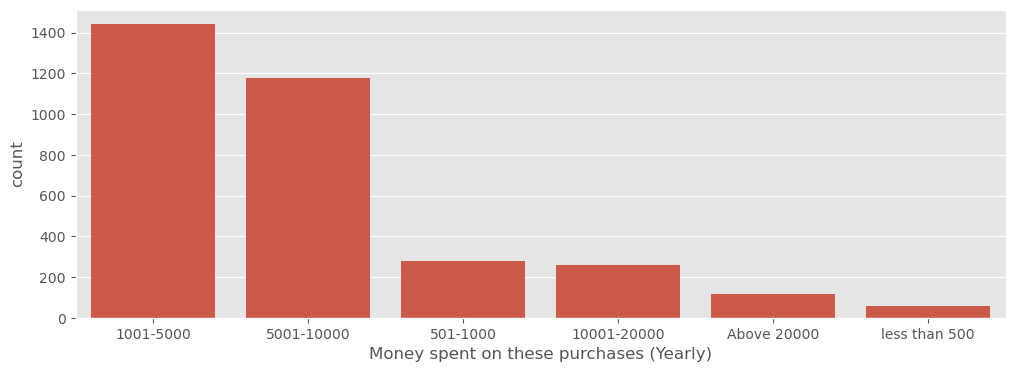

In [11]:
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(data=spend_counts)
plt.show()

<Axes: xlabel='Money spent on these purchases (Yearly) (₹)', ylabel='Percentage of Age Group (%)'>

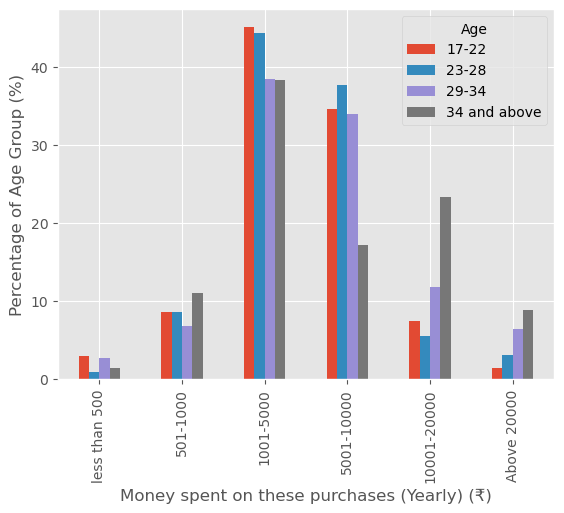

In [12]:
crosstab_table = pd.crosstab(df['Money spent on these purchases (Yearly)'], df['Age'])
results_table = crosstab_table.div(crosstab_table.sum(axis=0),axis=1).mul(100).round(2)

order=['less than 500','501-1000','1001-5000','5001-10000','10001-20000','Above 20000']
results_table_s = results_table.reindex(order)
results_table_s.plot.bar(ylabel='Percentage of Age Group (%)',
                       xlabel='Money spent on these purchases (Yearly) (₹)'
                       )

#This shows the relative percentage of each age group and the amount of money spent on online purchases
#The older age group have higher percentages in the upper spending groups and a more even spread across all groups
#The difference in age seems to dictate the amount of money spent online, likely due to better access to more funds

<Axes: xlabel='split_values'>

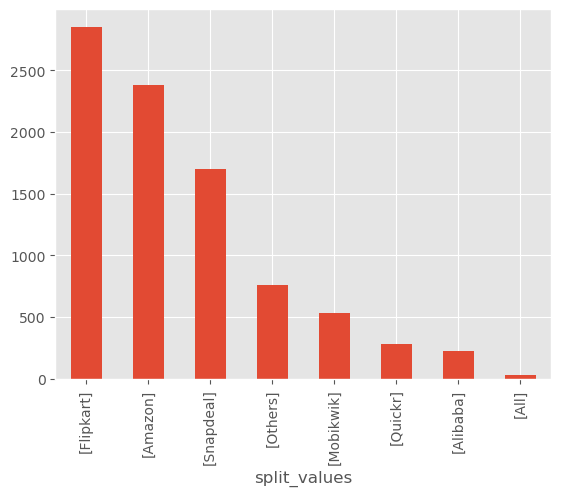

In [13]:
#Extracting values from the column which are separated by commas
df['split_values'] = df['Which website(s) do you frequently visit?(Multiple answers)'].str.split(',')
df_split = df.explode('split_values')
#Removing whitespace from the values so can perform value counts
df_split['split_values'] = df_split['split_values'].str.split()
df_split['split_values'].value_counts().plot.bar()

In [14]:
#Removing split values column
df = df.drop(['split_values'],axis=1)

In [15]:
features = df.columns
ord_features=features[8:] #All ordinal features
ord_features

Index(['I make a purchase from website(s) on the basis of its design and graphics (colors,layout and images etc.).',
       'I only make a purchase from website(s) if it displays branded products.',
       'I feel comfortable to purchase from a website with interactive features.',
       'I study terms and conditions before making an online payment.',
       'I am comfortable with an online transaction only if I see familiar bank website with third party seal of payment.',
       'I make the purchase from any website during the season off sale or mega sale.',
       'I will suggest my friends and family to purchase from this website(s) because word travels fast.',
       'I will probably make another purchase from the website based on the recent shopping experience.',
       'I think timely delivery of product is important from the online shopping website(s).',
       'It is convenient to surf and navigate for different products on the website rather than visiting store.',
       'Onli

## Attempting to Manually put Questions into Groups

In [16]:
#First attempt at putting questions into shared questions/factors
categories = {
    'Security_Privacy': ['I study terms and conditions before making an online payment.','I am comfortable with an online transaction only if I see familiar bank website with third party seal of payment.','It is important for websites to maintain privacy of their customers.','I am worried that my financial information will be hacked.','It worries me if a website asks too many personal question(s).','I will purchase a product if I think the vendors on website are trustworthy.'],
    'Website_Features': ['I make a purchase from website(s) on the basis of its design and graphics (colors layout and images etc.).','I only make a purchase from website(s) if it displays branded products.','I feel comfortable to purchase from a website with interactive features.','The website I frequently purchase from has a good ranking.','The information provided by the website I visit frequently is always sufficient and of high quality.','I think the websites must timely update the information related to prices and availability of the product.','I make the purchase only when I know the purchase process of the website.'],
    'Prefer_Online_Shopping': ['It is convenient to surf and navigate for different products on the website rather than visiting store.'],
    'Favours_Favourite_Website': ['I can make e-payment over the website I frequently visit without worrying too much.','I will suggest my friends and family to purchase from this website(s) because word travels fast.','I will probably make another purchase from the website based on the recent shopping experience.'],
    'Reviews_Reputation': ['I make the purchase only if the website is well known.','I make the purchase after studying the review(s) of the site.'],
    'Product_Quality': ['I only make a purchase from website(s) if it displays branded products.','I think timely delivery of product is important from the online shopping website(s).','The information provided by the website I visit frequently is always sufficient and of high quality.','I purchase from a site if I feel that vendors on this website give assurance of the product quality.','It is important for a website to display true information about the product i am paying for.'],
    'Driven_Competitive': ["It's important for me to finish the work some way or the other.",'I prefer my life to be filled with challenges that I should overcome.','I become competitive around highly intelligent people.'],
    'Introspective': ['I watch programs that increase moral and academic knowledge.','I like to find out my strengths and weaknesses through in-depth analysis.'],
    'Intellectual_Thinker': ['I watch programs that increase moral and academic knowledge.','I prefer discussing social economic or cultural problems rather than sharing page three readings.'],
    'Analytical_Thinker': ['I like to find out my strengths and weaknesses through in-depth analysis.','I actually enjoy bringing solutions to a problem.'],
    'Affected_by_Shopping': ['I feel peaceful after making a purchase.','I am passionate about shopping.','I get inspired by friend(s)/family to shop for domestic products.','I regret and hesitate to accept the order at the time of delivery.','I feel excited and anxious when I see someone shopping.','I feel guilty and embarrassed whenever I make an impulse purchase.','Your friend tells you about an ongoing online sale where you purchase a very expensive item at a low cost. You felt pride and victorious.','While surfing through different shopping websites you come across several offers and you feel overjoyed and eager to purchase.'],
}

In [17]:
#Second attempt at putting questions into shared groups/factors
categories2 = {
    'Website Usability and Design Satisfaction': ['I make a purchase from website(s) on the basis of its design and graphics (colors,layout and images etc.).','I feel comfortable to purchase from a website with interactive features.','It is convenient to surf and navigate for different products on the website rather than visiting store.','The information provided by the website I visit frequently is always sufficient and of high quality.'],
    'Trust and Security Confidence ':['I am comfortable with an online transaction only if I see familiar bank website with third party seal of payment.','I can make e-payment over the website I frequently visit without worrying too much.','It is important for websites to maintain privacy of their customers.','I would prefer COD(cash on delivery) even on a popular website instead of online payment.'],
    'Customer Loyalty and Satisfaction ':['I will suggest my friends and family to purchase from this website(s) because word travels fast.','I will probably make another purchase from the website based on the recent shopping experience.','I think timely delivery of product is important from the online shopping website(s).','I am happy and satisfied with the money transaction process on the website that I visit frequently.'],
    'Vendor Credibility and Information Quality ':['I think the websites must timely update the information related to prices and availability of the product.','It is important for a website to display true information about the product i am paying for.','I purchase from a site if I feel that vendors on this website give assurance of the product quality.','I will purchase a product if I think the vendors on website are trustworthy.'],
    'Purchase Decision Factors':['I only make a purchase from website(s) if it displays branded products.','I make the purchase from any website during the season off sale or mega sale.','I make the purchase after studying the review(s) of the site.','I make the purchase only if the website is well known.'],
    'Problem-Solving Attitude':["It's important for me to finish the work some way or the other.",'I would choose to know answers to the problem instead of interpreting reason(s) to the problem.','I prefer my life to be filled with challenges that I should overcome.','I actually enjoy bringing solutions to a problem.'],
    'Emotional Shopping Tendencies':['I feel peaceful after making a purchase.','I am passionate about shopping.','I get inspired by friend(s)/family to shop for domestic products.','I make a purchase when I see a touching advertisement.'],
    'Social and Economic Awareness':['I prefer discussing social,economic or cultural problems rather than sharing page three readings.','I watch programs that increase moral and academic knowledge.','I respect and understand the challenges faced by the service provider.','I carefully consider options about issues but usually get influenced by them.'],
    'Self-Reflection and Personal Growth':['I become competitive around highly intelligent people.','I like to find out my strengths and weaknesses through in-depth analysis.','I am always in doubt while taking important decisions.','I set my emotions according to the emotional situations.'],
    'Online Shopping Convenience':['Online purchase helps me to conserve time and money.','I think timely delivery of product is important from the online shopping website(s).','I am relieved after finishing any complicated task but that does not fulfil my true aspirations.','I prefer those responsibilities that can be easily handled.']

}

In [18]:
#Assessing the Cronbach Alpha for the initial category groups
#The number is not significant for any group. With 0.7 as the threshold for significancy
data = df[categories2['Purchase Decision Factors']]
pg.cronbach_alpha(data=data)

(np.float64(0.1521016129525911), array([0.104, 0.198]))

# Exploratory Factor Analysis (EFA)

## Finding Optimal Factors Using Elbow Method

In [19]:
#Creating the Factor Analysis with 6 factors as specified in the inertia below
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(df[ord_features])

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

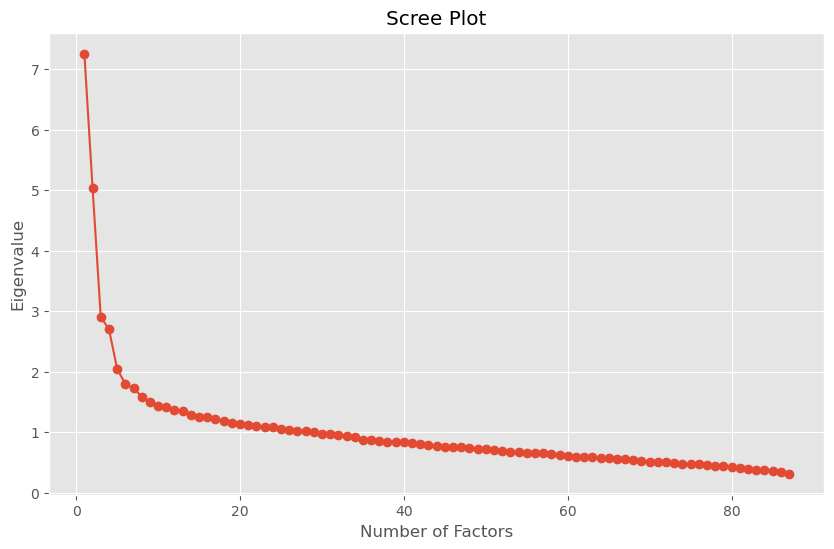

In [20]:
ev, v = fa.get_eigenvalues()

plt.figure(figsize=(10,6))
plt.plot(range(1,len(ev)+1),ev,marker="o")
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')

plt.show()

## Assessing Loadings Scores for Each Factor

In [257]:
#Sorting by highest and lowest values and grouping anything in each factor higher/lower than 0.4/-0.4
loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings,index=df[ord_features].columns,columns=['Factor_1','Factor_2','Factor_3','Factor_4','Factor_5','Factor_6'])
loadings_df.sort_values(by=['Factor_1'], ascending=False).head(15)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6
I am not inspired enough to learn new methods.,0.504748,-0.121709,0.307119,-0.065163,0.033980,0.175778
I make a purchase when I see a touching advertisement.,0.494036,0.017237,0.196139,0.133359,-0.179730,0.103231
I can’t imagine myself in deep emotional situations whether happy or sad.,0.485542,-0.126403,0.045290,-0.031423,0.119933,0.090101
I surrender and accept the opinion of others even if they are wrong.,0.481765,-0.132710,0.214390,-0.005002,-0.102113,0.115120
I regret and hesitate to accept the order at the time of delivery.,0.471221,-0.218100,0.220073,-0.022190,0.019122,0.139860
I am not fond of feeling extreme emotions.,0.468312,-0.042664,0.005579,0.043505,0.148048,0.046273
After an emotional situation I feel liberated rather than contented.,0.462381,0.101584,-0.027651,-0.005638,0.100629,-0.061345
I feel excited and anxious when I see someone shopping.,0.451559,-0.029508,0.177312,0.036975,-0.066294,-0.031130
I like to think selfishly when I strongly desire something.,0.448821,-0.071923,-0.005281,0.056851,0.027902,0.000459
I often go for shopping when I am sad and depressed.,0.445584,-0.044198,0.118474,0.061464,0.077225,0.031901


### Grouping Questions Based on Loadings Scores

In [22]:
#Names were chosen manually based on the theme of questions within each group
factor_groups = {
    'Emotional Influence on Shopping':[
        'I am not inspired enough to learn new methods.',
        'I make a purchase when I see a touching advertisement.',
        'I can’t imagine myself in deep emotional situations whether happy or sad.',
        'I surrender and accept the opinion of others even if they are wrong.',
        'I regret and hesitate to accept the order at the time of delivery.',
        'I am not fond of feeling extreme emotions.',
        'After an emotional situation I feel liberated rather than contented.',
        'I feel excited and anxious when I see someone shopping.',
        'I like to think selfishly when I strongly desire something.',
        'I often go for shopping when I am sad and depressed.',
        'I feel guilty and embarrassed whenever I make an impulse purchase.',
        'I set my emotions according to the emotional situations.',
        'I get inspired by friend(s)/family to shop for domestic products.',
        'I do not make a purchase of the product I like during intense emotional moments.',
        'I am passionate about shopping.'
                                      ],
    'Trust and Convenience in Online Shopping':[
        'I think timely delivery of product is important from the online shopping website(s).',
        'It is important for websites to maintain privacy of their customers.',
        'The website I frequently purchase from has a good ranking.',
        'I can make e-payment over the website I frequently visit without worrying too much.',
        'It is important for a website to display true information about the product i am paying for.',
        'Online purchase helps me to conserve time and money.',
        'I purchase from a site if I feel that vendors on this website give assurance of the product quality.',
        'It worries me if a website asks too many personal question(s).',
        'The information provided by the website I visit frequently is always sufficient and of high quality.',
        'I will probably make another purchase from the website based on the recent shopping experience.',
        'I am comfortable with an online transaction only if I see familiar bank website with third party seal of payment.',
        'It is convenient to surf and navigate for different products on the website rather than visiting store.'
                                               ],
    'Preference for Simplicity':[
        "I don't like to think the intellectual way.",
        'Working/Studying intentionally for long hours does not bring me joy.',
        'I like to take on a simple task rather than a challenging one as it would require use of more of my abilities',
        "I try to make a guess and don't think much about complex situations.",
        'I prefer those responsibilities that can be easily handled.',
        "I don't like to understand how the things will turn out. ",
        'I am not inspired enough to learn new methods.'
                                ],
    'Branding and Aesthetic Appeal in Online Shopping':[
        'I only make a purchase from website(s) if it displays branded products.',
        'I make a purchase from website(s) on the basis of its design and graphics (colors,layout and images etc.).',
        'I make the purchase from any website during the season off sale or mega sale.',
                                                       ],
       'Emotional Perception in Social Contexts':[
        'What level of emotion do u see? Surprise and interest',
        'What level of emotion do u see? Thoughtful and Stress',
        'What level of emotion do u see? Distress and Sad',
        'What level of emotion do u see? arrogant and pride',
        'What level of emotion do u see? Flirty and interest',
        'What level of emotions do you see? Happy and Giggly',
                                              ]
}

### Checking the Cronbach Alpha for Each Factor

In [23]:
data = df[factor_groups['Emotional Perception in Social Contexts']]
pg.cronbach_alpha(data=data)
#For groups with lower than 0.7, additional factors were added which increased the cronbach alpha significantly

(np.float64(0.6292578868858231), array([0.609, 0.648]))

### Calculating each participant's scores for the factors and adding to the data frame.

In [24]:
df['Emotional Influence on Shopping'] = df[factor_groups['Emotional Influence on Shopping']].sum(axis=1)
df['Trust and Convenience in Online Shopping'] = df[factor_groups['Trust and Convenience in Online Shopping']].sum(axis=1)
df['Preference for Simplicity'] = df[factor_groups['Preference for Simplicity']].sum(axis=1)
df['Emotional Perception in Social Contexts'] = df[factor_groups['Emotional Perception in Social Contexts']].sum(axis=1)
df['Branding and Aesthetic Appeal in Online Shopping'] = df[factor_groups['Branding and Aesthetic Appeal in Online Shopping']].sum(axis=1)
df.columns[95:]

Index(['Emotional Influence on Shopping',
       'Trust and Convenience in Online Shopping', 'Preference for Simplicity',
       'Emotional Perception in Social Contexts',
       'Branding and Aesthetic Appeal in Online Shopping'],
      dtype='object')

### Assessing each Factor's Information

In [25]:
#Finding the mean score for each group
df[['Emotional Influence on Shopping',
       'Trust and Convenience in Online Shopping', 'Preference for Simplicity',
       'Emotional Perception in Social Contexts',
       'Branding and Aesthetic Appeal in Online Shopping']].mean()

Emotional Influence on Shopping                     52.486332
Trust and Convenience in Online Shopping            46.066687
Preference for Simplicity                           24.550916
Emotional Perception in Social Contexts             20.872935
Branding and Aesthetic Appeal in Online Shopping    11.950135
dtype: float64

In [26]:
#Finding the upper quartile range in the chosen factor
emotional_influence_up_quartile = df['Emotional Influence on Shopping'].quantile(0.75)
emotional_influence_up_quartile

np.float64(57.0)

# Correlational Analysis

# Data Preparation

In [27]:
#Preprocessing the data the the values are standardised with a mean of 0 and standard deviation of 1
scaler=StandardScaler()
scaled_data = scaler.fit_transform(df[ord_features])

In [28]:
#Creating some groups of columns for easier reference
demographics = [
    'Age','Gender','Online purchase frequency','Academic Qualification','Type of University','Money spent on these purchases (Yearly)'
]
emotional_reactions = ['Your friend tells you about an ongoing online sale where you purchase a very expensive item at a low cost. You felt pride and victorious. ',
                       'You made a purchase of an item your mother/father loves a lot but it turns out that your mother/father did not like the quality of the product that much. You felt sad and embarrassed.',
                       'While surfing through different shopping websites you come across several offers and you feel overjoyed and eager to purchase. ',
                       'Think about the situation when you wish to return the product but the company had poor return services. You felt dissatisfied and frustrated.',
                       'Think about the situation in which you have gone online but your product in mind is out of stock. You felt disappointment and anger.'
                      ]
emotional_levels = ['What level of emotion do u see? Rejoice and love',
                    'What level of emotion do u see? Aggression and Relaxation',
                    'What level of emotion do u see? Thoughtful and Stress',
                    'What level of emotion do u see? Surprise and interest',
                    'What level of emotion do u see? arrogant and pride',
                    'What level of emotion do u see? Distress and Sad',
                    'What level of emotion do u see? Flirty and interest',
                    'What level of emotion do u see? Disgust and Sick',
                    'What level of emotion do you see? Afraid and worried',
                    'What level of emotions do you see? Happy and Giggly'
                   ]


In [29]:
#Looking at scores in the Emotional Influence on Shopping group in the upper quartile range, and questions around emotional reactions
df[df['Emotional Influence on Shopping']>=emotional_influence_up_quartile][emotional_reactions].median()

Your friend tells you about an ongoing online sale where you purchase a very expensive item at a low cost. You felt pride and victorious.                                                  4.0
You made a purchase of an item your mother/father loves a lot but it turns out that your mother/father did not like the quality of the product that much. You felt sad and embarrassed.    3.0
While surfing through different shopping websites you come across several offers and you feel overjoyed and eager to purchase.                                                             4.0
Think about the situation when you wish to return the product but the company had poor return services. You felt dissatisfied and frustrated.                                              4.0
Think about the situation in which you have gone online but your product in mind is out of stock. You felt disappointment and anger.                                                       4.0
dtype: float64

In [30]:
#Looking at scores in the Emotional Influence on Shopping group below the upper quartile range, and questions around emotional reactions
df[df['Emotional Influence on Shopping']<emotional_influence_up_quartile][emotional_reactions].median()

Your friend tells you about an ongoing online sale where you purchase a very expensive item at a low cost. You felt pride and victorious.                                                  4.0
You made a purchase of an item your mother/father loves a lot but it turns out that your mother/father did not like the quality of the product that much. You felt sad and embarrassed.    4.0
While surfing through different shopping websites you come across several offers and you feel overjoyed and eager to purchase.                                                             4.0
Think about the situation when you wish to return the product but the company had poor return services. You felt dissatisfied and frustrated.                                              4.0
Think about the situation in which you have gone online but your product in mind is out of stock. You felt disappointment and anger.                                                       4.0
dtype: float64

#### There seems to be almost identical scores for both groups, implying no correlation here
#### Median was used instead of mean because of the ordinal state of the data.

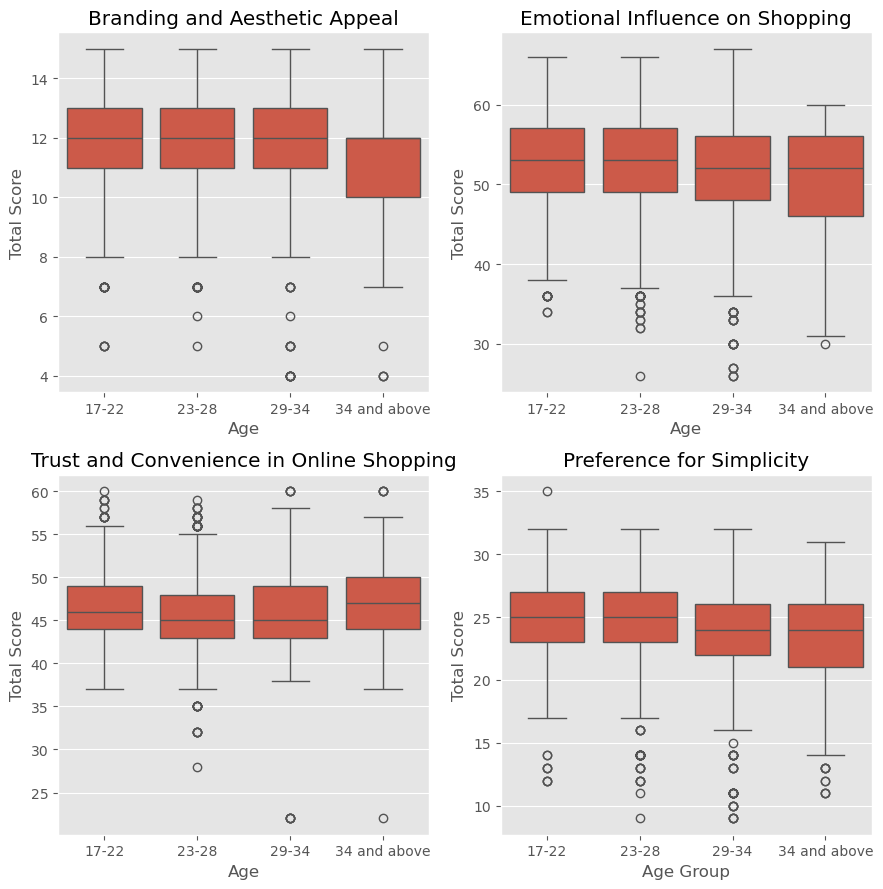

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9)) 

sns.boxplot(x='Age', y='Branding and Aesthetic Appeal in Online Shopping', data=df, ax=axs[0,0],order=['17-22','23-28','29-34','34 and above'])
axs[0,0].set_xlabel('Age')
axs[0,0].set_ylabel('Total Score')
axs[0,0].set_title('Branding and Aesthetic Appeal')

sns.boxplot(data=df, x='Age', y='Emotional Influence on Shopping', legend=False, ax=axs[0,1],order=['17-22','23-28','29-34','34 and above'])
axs[0,1].set_xlabel('Age')
axs[0,1].set_ylabel('Total Score')
axs[0,1].set_title('Emotional Influence on Shopping')

sns.boxplot(data=df, x='Age', y='Trust and Convenience in Online Shopping', ax=axs[1,0],order=['17-22','23-28','29-34','34 and above'])
axs[1,0].set_xlabel('Age')
axs[1,0].set_ylabel('Total Score')
axs[1,0].set_title('Trust and Convenience in Online Shopping')

sns.boxplot(data=df, x='Age', y='Preference for Simplicity', legend=False, ax=axs[1,1],order=['17-22','23-28','29-34','34 and above'])
axs[1,1].set_xlabel('Age Group')
axs[1,1].set_ylabel('Total Score')
axs[1,1].set_title('Preference for Simplicity')

plt.tight_layout()

plt.show()

#### There looks to be lower scores in Branding and Aesthetic Appeal for the 34 and above age group, implying that younger people care more about this factor.
#### This older age group also seem to have a less emotional influence on shopping, and less preference for simplicity.

### Looking at the spread of scores for each group.

In [261]:
#Looking for correlations between the question groups in a correlation matrix

df[['Emotional Influence on Shopping',
       'Trust and Convenience in Online Shopping', 'Preference for Simplicity',
       'Emotional Perception in Social Contexts',
       'Branding and Aesthetic Appeal in Online Shopping']].corr()

#There seems to be no real correlation between the groups, which is positive as each group should be incorrelated factors

,Emotional Influence on Shopping,Trust and Convenience in Online Shopping,Preference for Simplicity,Emotional Perception in Social Contexts,Branding and Aesthetic Appeal in Online Shopping
Emotional Influence on Shopping,1.000000,-0.090823,0.575314,0.103883,0.144601
Trust and Convenience in Online Shopping,-0.090823,1.000000,-0.149465,0.167177,0.033795
Preference for Simplicity,0.575314,-0.149465,1.000000,-0.046893,0.187739
Emotional Perception in Social Contexts,0.103883,0.167177,-0.046893,1.000000,0.006132
Branding and Aesthetic Appeal in Online Shopping,0.144601,0.033795,0.187739,0.006132,1.000000


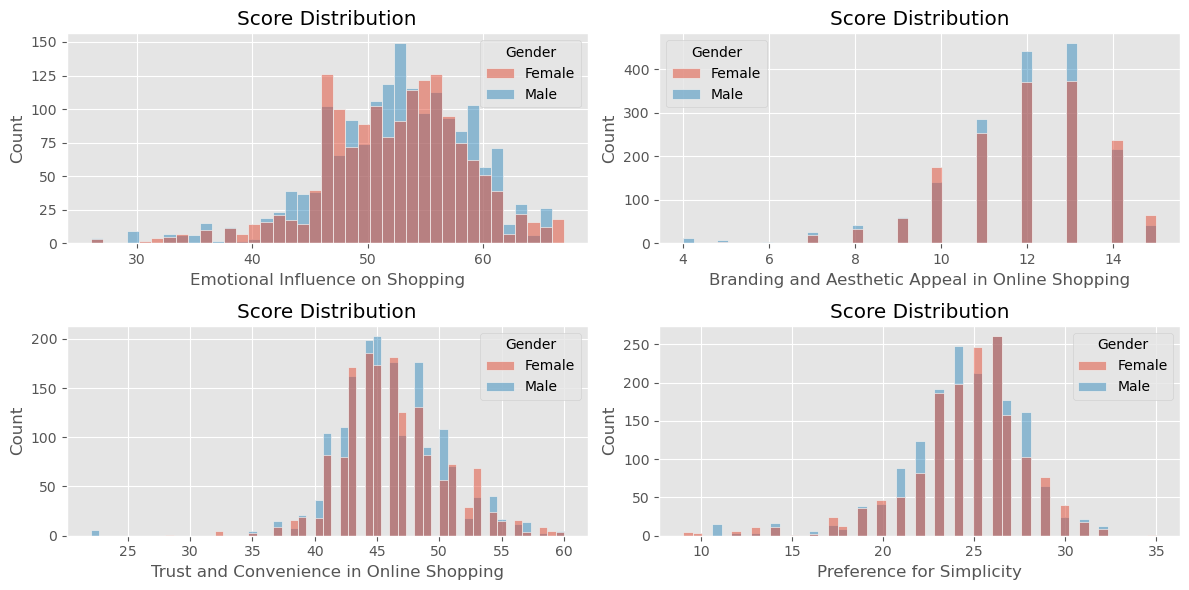

In [33]:
fig, axs = plt.subplots(2,2,figsize=(12, 6))

sns.histplot(data=df, x='Emotional Influence on Shopping',hue='Gender',ax=axs[0,0])
axs[0,0].set_xlabel('Emotional Influence on Shopping')
axs[0,0].set_title('Score Distribution')

sns.histplot(data=df, x='Branding and Aesthetic Appeal in Online Shopping',hue='Gender',ax=axs[0,1])
axs[0,1].set_xlabel('Branding and Aesthetic Appeal in Online Shopping')
axs[0,1].set_title('Score Distribution')

sns.histplot(data=df, x='Trust and Convenience in Online Shopping',hue='Gender',ax=axs[1,0])
axs[1,0].set_xlabel('Trust and Convenience in Online Shopping')
axs[1,0].set_title('Score Distribution')

sns.histplot(data=df, x='Preference for Simplicity',hue='Gender',ax=axs[1,1])
axs[1,1].set_xlabel('Preference for Simplicity')
axs[1,1].set_title('Score Distribution')

plt.tight_layout()

plt.show()

### The slight left-skew on each chart may indicate an acquiescence bias, which is the tendency to agree with questions in a survey

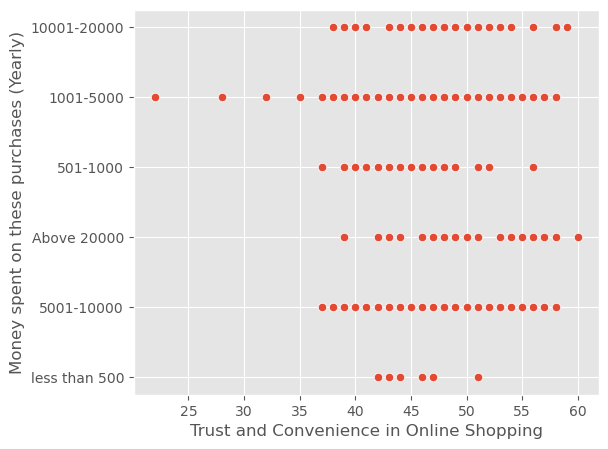

In [34]:
fig, ax = plt.subplots(figsize=(6,5))

sns.scatterplot(data=df, x='Trust and Convenience in Online Shopping', y='Money spent on these purchases (Yearly)', legend=False)

plt.show()

### The higher a participant's score in the Trust and Convenience in Online Shopping category, the more likely to be in the higher spending groups
### Showing a value for increased value on trust and convenience

# Mulinomial Logistic Regression Analysis

In [124]:
# Assigning the X and y variables to be used in the analysis
X = pd.DataFrame(df[['Emotional Influence on Shopping','Trust and Convenience in Online Shopping','Preference for Simplicity','Branding and Aesthetic Appeal in Online Shopping']])
y = df['Money spent on these purchases (Yearly)']

#Calculating the Pearson Correlation for the Trust and Convenience factor with scores from the Terms and Conditions question
#resultp = pearsonr(X, y)
#resultp

In [103]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Predict the categories for the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.2238020010531859
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       389
           2       0.25      0.48      0.33       375
           3       0.22      0.59      0.32       370
           4       0.00      0.00      0.00       390
           5       0.14      0.07      0.10       375

    accuracy                           0.22      1899
   macro avg       0.12      0.23      0.15      1899
weighted avg       0.12      0.22      0.15      1899

Confusion Matrix:
 [[  0 138 251   0   0]
 [  0 179 130   0  66]
 [  0  99 219   0  52]
 [  0 130 218   0  42]
 [  0 175 173   0  27]]


/Users/dannygage/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dannygage/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/dannygage/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dannygage/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classifica

# Decision Tree Analysis

In [177]:
# Map spending categories in order for better analysis
spending_category_map = {
    'less than 500': 0,
    '501-1000': 1,
    '1001-5000': 2,
    '5001-10000': 3,
    '10001-20000': 4,
    'Above 20000': 5
}
df['spending_mapped'] = df['Money spent on these purchases (Yearly)'].map(spending_category_map)
df['spending_mapped']

0       4
1       4
2       2
3       1
4       1
       ..
3324    3
3325    2
3326    4
3327    3
3328    4
Name: spending_mapped, Length: 3329, dtype: int64

In [262]:
df['Money spent on these purchases (Yearly)'].value_counts()

#This imbalance will produce inaccurate results in the models analysis so resampling will need to be conducted.

Money spent on these purchases (Yearly)
1001-5000        1440
5001-10000       1178
501-1000          279
10001-20000       260
Above 20000       115
less than 500      57
Name: count, dtype: int64

In [178]:
X = pd.DataFrame(df[['Emotional Influence on Shopping','Trust and Convenience in Online Shopping','Preference for Simplicity','Branding and Aesthetic Appeal in Online Shopping']])
y = df['spending_mapped']

In [211]:
# Resampling the data to reduce the imbalance between categories in the Y variable

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X,y)
#X_resampled.value_counts()

In [209]:
#Resampling with SMOTE instead of RandomOverSampler
#sm1 = SMOTE(random_state=0)
#X_resampled, y_resampled = sm1.fit_resample(X,y)

[Text(0.42777777777777776, 0.9166666666666666, 'Preference for Simplicity <= 20.5\ngini = 0.833\nsamples = 6912\nvalue = [1164, 1149, 1129, 1172, 1134, 1164]'),
 Text(0.16111111111111112, 0.75, 'Emotional Influence on Shopping <= 35.0\ngini = 0.574\nsamples = 1007\nvalue = [0, 46, 101, 78, 159, 623]'),
 Text(0.29444444444444445, 0.8333333333333333, 'True  '),
 Text(0.06666666666666667, 0.5833333333333334, 'Branding and Aesthetic Appeal in Online Shopping <= 12.5\ngini = 0.587\nsamples = 140\nvalue = [0, 4, 10, 10, 82, 34]'),
 Text(0.044444444444444446, 0.4166666666666667, 'Branding and Aesthetic Appeal in Online Shopping <= 8.5\ngini = 0.382\nsamples = 106\nvalue = [0, 4, 10, 10, 82, 0]'),
 Text(0.022222222222222223, 0.25, 'gini = 0.604\nsamples = 15\nvalue = [0, 4, 8, 3, 0, 0]'),
 Text(0.06666666666666667, 0.25, 'Preference for Simplicity <= 15.0\ngini = 0.182\nsamples = 91\nvalue = [0, 0, 2, 7, 82, 0]'),
 Text(0.044444444444444446, 0.08333333333333333, 'gini = 0.586\nsamples = 18\nva

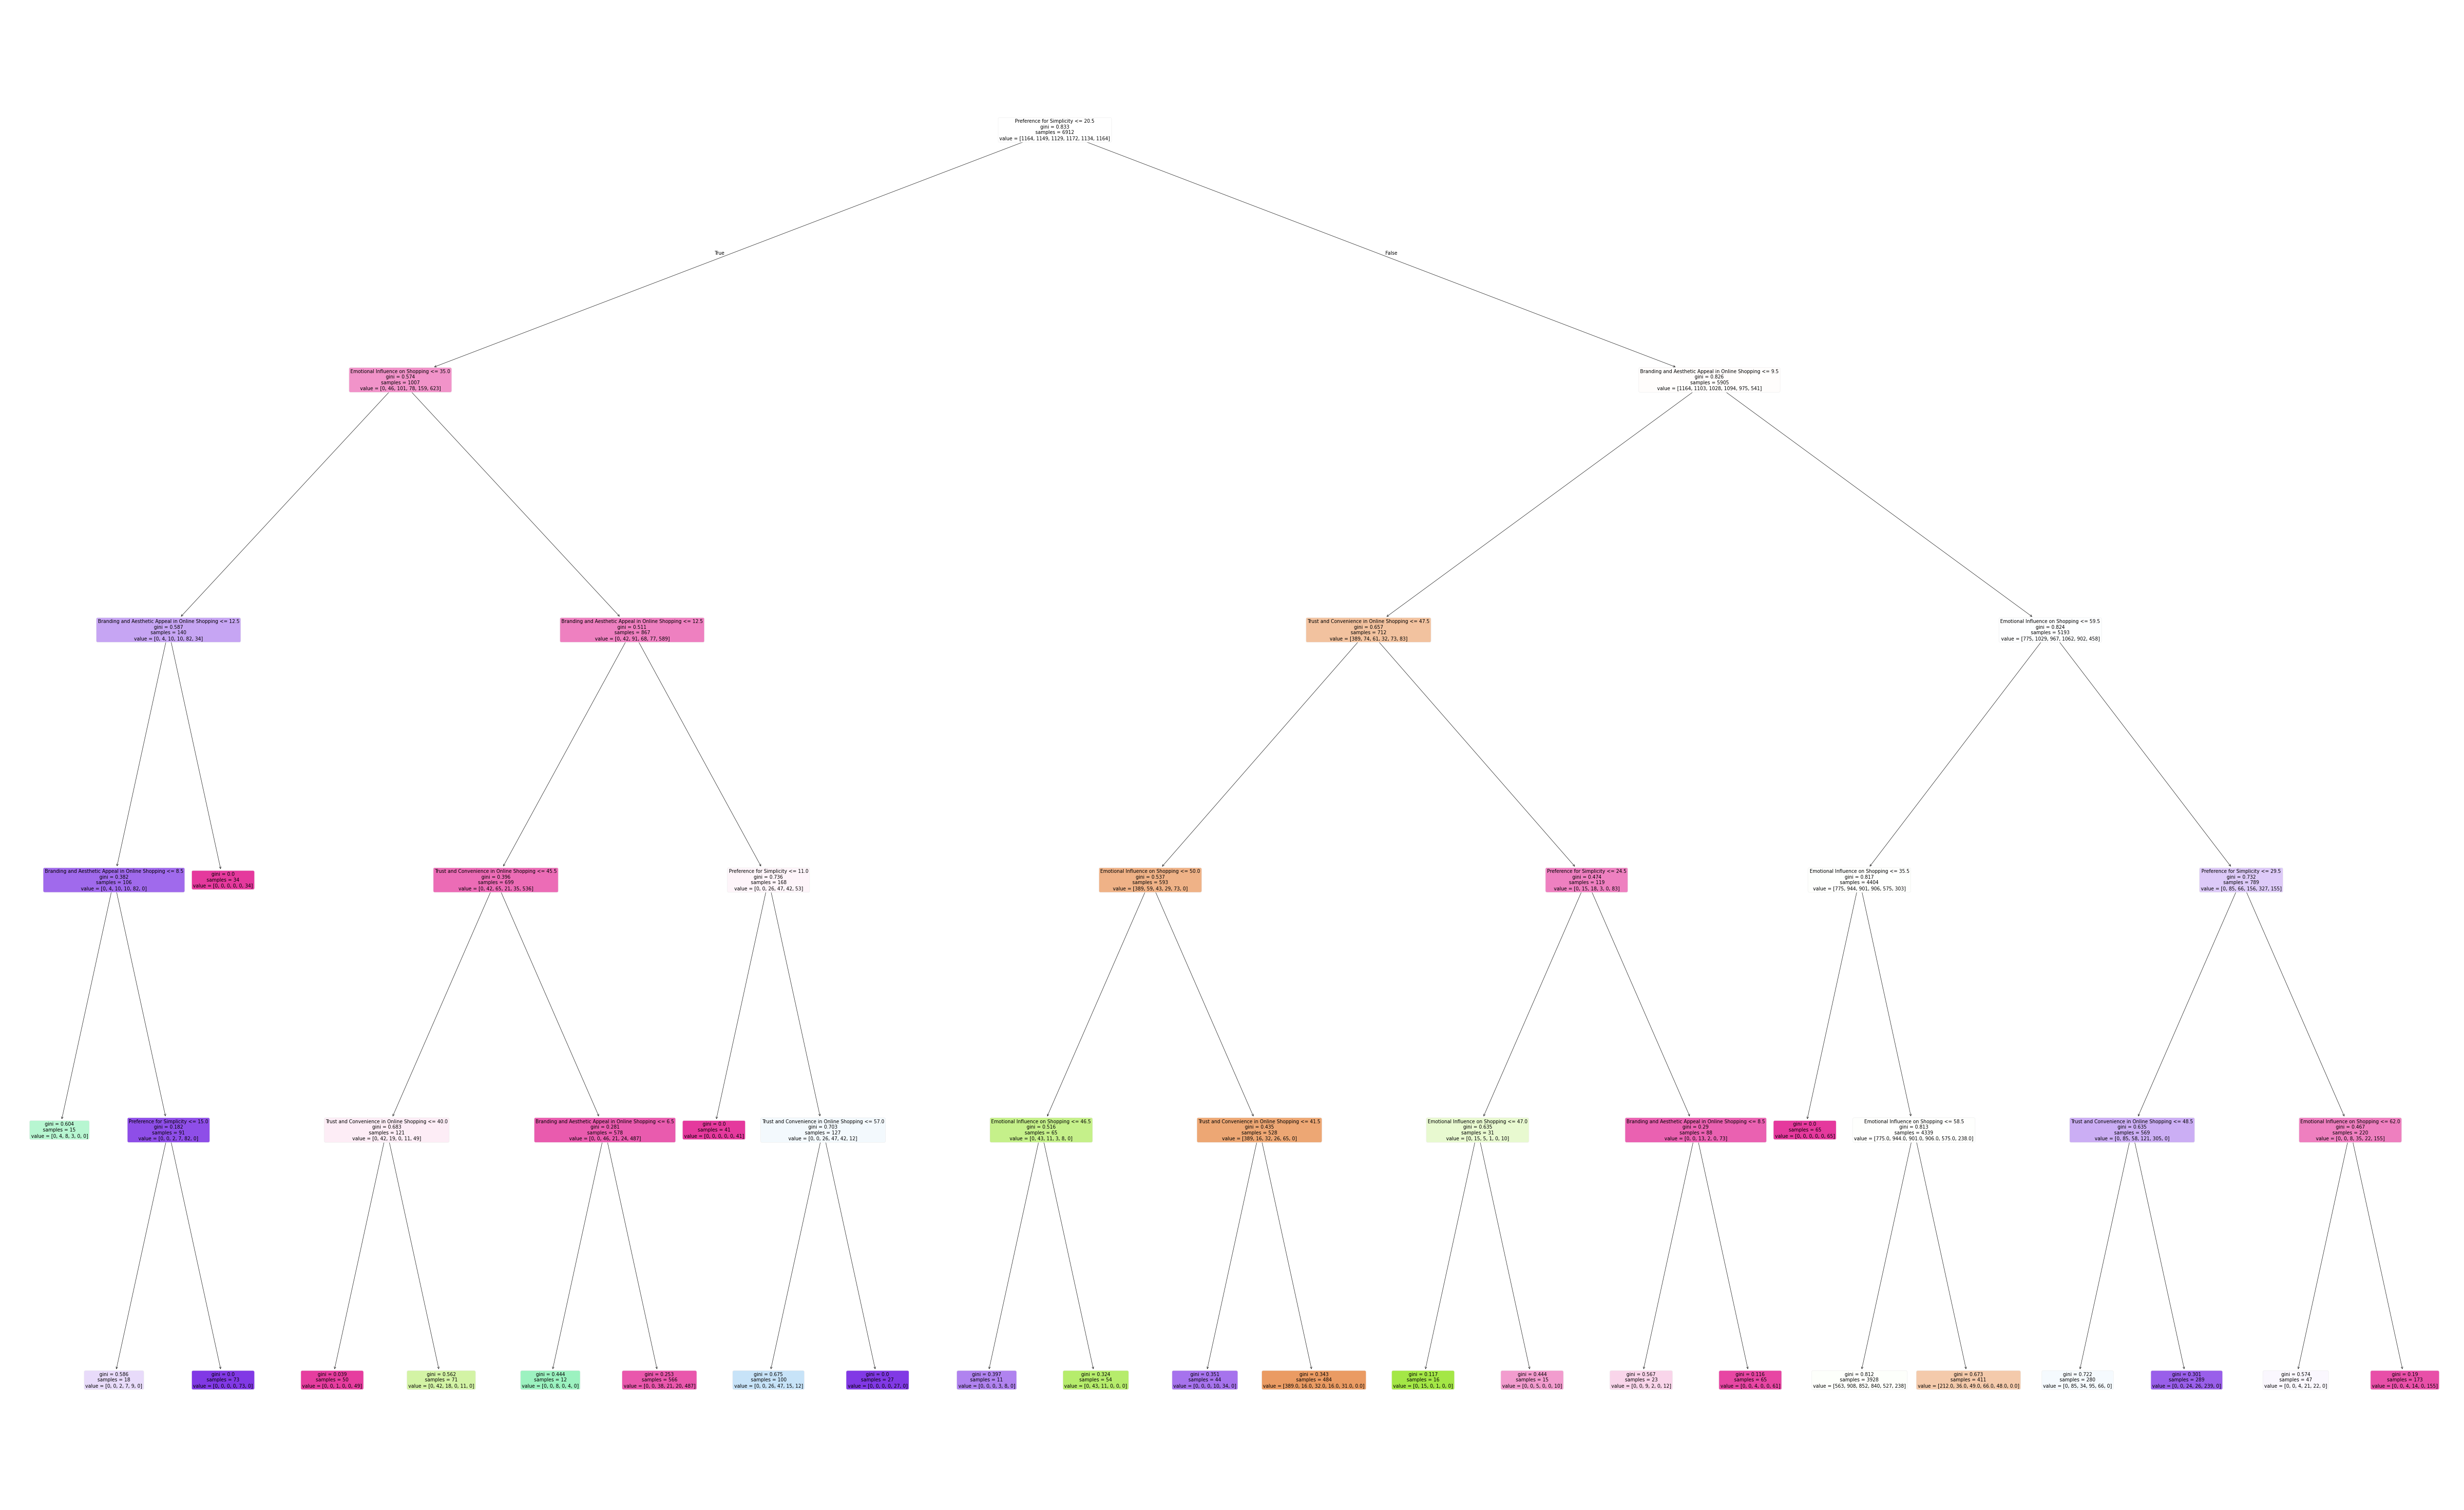

In [212]:
# split the data into test and train subsets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
dtree = DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=10)
dtree = dtree.fit(X_train, y_train)

plt.figure(figsize=(65,40))

tree.plot_tree(dtree, 
               feature_names=X.columns,
              filled=True,
              rounded=True,
               fontsize=7
              )
#plt.savefig('2decision_tree.png', dpi=300)

In [213]:
#Make predictions based on the test set and assess model performance
y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.4409722222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.49      0.56       276
           1       0.25      0.88      0.39       291
           2       0.50      0.02      0.03       311
           3       0.32      0.10      0.16       268
           4       0.83      0.40      0.54       306
           5       0.88      0.78      0.83       276

    accuracy                           0.44      1728
   macro avg       0.57      0.45      0.42      1728
weighted avg       0.58      0.44      0.41      1728



In [254]:
# Using a Random Forest Classifier on the data to improve prediction accuracy
rf_classifier = RandomForestClassifier(n_estimators=50,random_state=0,max_depth=10,min_samples_leaf=5)

rf_classifier.fit(X_train,y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)

report = classification_report(y_test,y_pred)
print(f"Accuracy Score: {accuracy}")
print("Classification Report: ")
print(report)

Accuracy Score: 0.8495370370370371
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       276
           1       0.76      0.96      0.85       291
           2       0.74      0.55      0.63       311
           3       0.76      0.66      0.71       268
           4       0.93      0.97      0.95       306
           5       0.96      0.97      0.97       276

    accuracy                           0.85      1728
   macro avg       0.85      0.85      0.84      1728
weighted avg       0.84      0.85      0.84      1728



In [255]:
y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"Difference: {train_accuracy - test_accuracy}")


# Check the parameters in use
print(rf_classifier.get_params)

Training Accuracy: 0.8829571759259259
Testing Accuracy: 0.8495370370370371
Difference: 0.03342013888888884
<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       random_state=0)>


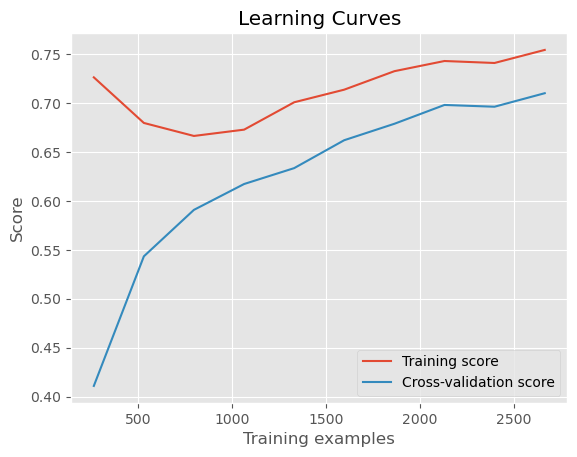

In [256]:
# Plotting learning curves to observe training and accuracy over time, helping indicate potential overfitting

# Increases by 10% of the training subset each time
# Defines a 5-fold cross-validation per training set
train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()

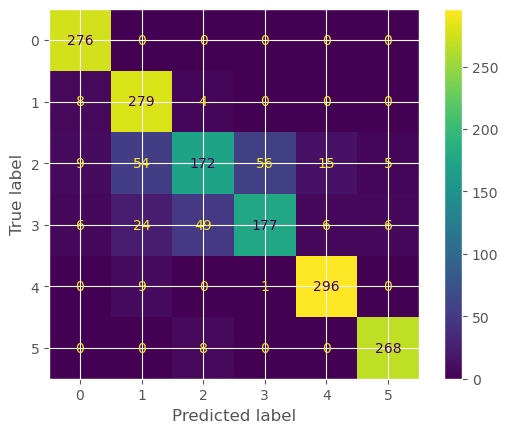

In [266]:
# Creating a confusion matrix to visualise the accuracy

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()